In [1]:
import numpy as np
import pyslsa
import matplotlib.pyplot as plt
%matplotlib inline
import neuraltda.topology2 as tp2
import neuraltda.simpComp as sc
import neuraltda.spectralAnalysis as sa
import neuraltda.pyslsa_environments as pse
import pandas as pd
import h5py as h5
import os
import datetime
import pickle
from neuraltda.pyslsa_environments import TPEnv
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20190408/
/home/brad/DailyLog/20190408/


In [44]:


results_file = '/home/brad/environment_out_random_place_fields_cuda_2_5_3.pkl'
results_file = '/home/brad/environment_out22_cuda.pkl'
results_file = '/home/brad/DailyLog/20180313/environment_out_random_place_fields_cuda_10_5_5.pkl'

results_file='/home/brad/DailyLog/20180405/environment_out_random_place_fields_cuda_sqrt_10_5_5.pkl'
results_file='/home/brad/DailyLog/20190220/environment_out_random_place_fields_cuda_sqrt_multipop_10_5_5.pkl'

# Load the results of PySLSA_EnvironmentTest.py
with open(results_file, 'rb') as f:
    (dists, spikes, fields, envs, corrmat) = pickle.load(f)

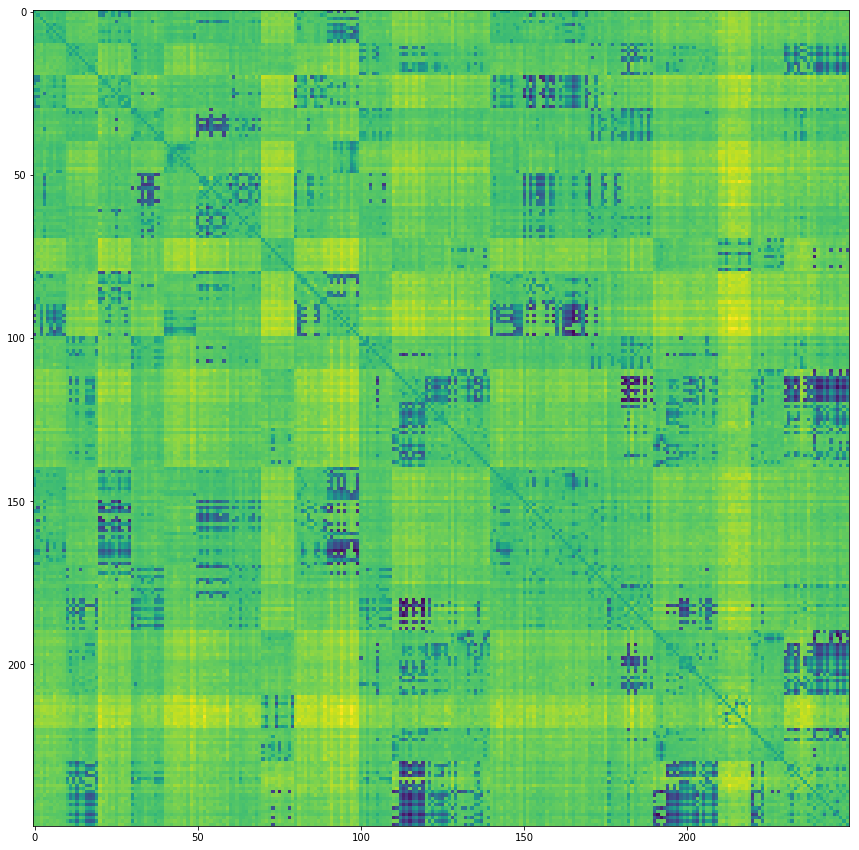

In [6]:
plt.figure(figsize=(15, 15))

dsym = dists + np.transpose(dists)
plt.imshow(dsym)

In [7]:
nenvs = len(envs)
ntrials = 10
nreps = 5
nholes = 5

e1e2means = np.zeros((nenvs, nenvs))
for env1 in range(nenvs):
    for env2 in range(nenvs):
        
        env1env2mean = np.mean(dsym[env1*ntrials:(env1*ntrials + ntrials), env2*ntrials:(env2*ntrials + ntrials)])
        e1e2means[env1, env2] = env1env2mean
        
hole_mat = np.zeros((nholes, nholes))
for b1 in range(nholes):
    for b2 in range(nholes):
        
        m = np.mean(e1e2means[b1*nreps:(b1*nreps+nreps), b2*nreps:(b2*nreps+nreps)])
        hole_mat[b1, b2] = m

NameError: name 'envs' is not defined

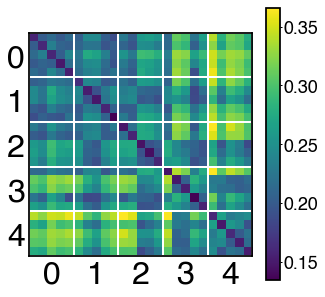

In [47]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
#plt.imshow(e1e2means, vmin=0.1, vmax=0.35)
plt.imshow(e1e2means)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=18, )
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_family('helvetica')
#cbar.set_label('JS Divergence')

#plt.xlabel('Number of Holes')
#plt.ylabel('Number of Holes')
#plt.title('JS Divergence', size=24)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
# ax.set_xticks([2, 7, 12, 17, 22])
# ax.set_yticks([2, 7, 12, 17, 22])
mintcks = np.arange(-0.5, nholes*nreps,  nreps)
majtcks = (mintcks[1:]+ mintcks[:-1])/2
ax.set_xticks(majtcks)
ax.set_yticks(majtcks)
ax.set_xticklabels(np.arange(nholes))
ax.set_yticklabels(np.arange(nholes))
ax.set_xticks(mintcks, minor=True);
ax.set_yticks(mintcks, minor=True);
ax.grid(which='minor', color='white', linewidth=2)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(32)
    item.set_fontname('helvetica')
figpath = os.path.join(figsavepth, 'JSDivergence-DifferentEnvironments.eps')
plt.savefig(figpath)


In [16]:
np.arange(-0.5, nholes*nreps,  3)

array([-0.5,  2.5,  5.5,  8.5, 11.5, 14.5])

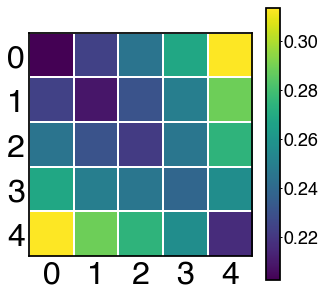

In [48]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.imshow(hole_mat)


cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=18, )
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_family('helvetica')
#cbar.set_label('JS Divergence')

#plt.xlabel('Number of Holes')
#plt.ylabel('Number of Holes')
#plt.title('JS Divergence', size=24)

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticklabels(np.arange(6))
ax.set_yticklabels(np.arange(6))
ax.set_xticks(np.arange(-0.5, 4,  1), minor=True);
ax.set_yticks(np.arange(-.5, 4, 1), minor=True);
ax.grid(which='minor', color='white', linewidth=2)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(32)
    item.set_fontname('helvetica')

#plt.savefig('/home/brad/placecellsim/envavgedJS-24.pdf')
figpath = os.path.join(figsavepth, 'EnvironmentAveragedJSDivergence.eps')
plt.savefig(figpath)

In [28]:
# Plot environments
with open('/home/brad/pcsim/environment_out_random_place_fields_precompute_10_5_5.pkl', 'rb') as f:
    (spikes, fields, envs, corrmat) = pickle.load(f)
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
env2 = envs[23]
fields2 = fields[23][0]
env1 = envs[6]
fields1 = fields[6][0]

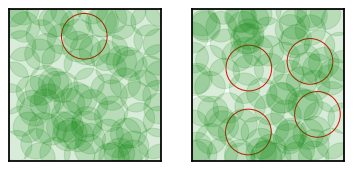

In [30]:
rad = 0.1*2

fig = plt.figure()
# plt.plot(pths1[0, :, 0], pths1[0, :, 1], alpha=0.5)
ax = fig.add_subplot(121)
#ax = plt.gca()
for hole in env1.holes:
    
    h1 = plt.Circle(hole, env1.hole_rad, fill=False, color='r', )
    ax.add_artist(h1)
for field in fields1:
    h2 = plt.Circle(field, rad, fill=True, color='g', alpha=0.15)
    ax.add_artist(h2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
ax.set_xticks([])
ax.set_yticks([])
#plt.title('Environment 1')
ax.set_aspect('equal')

ax = fig.add_subplot(122)
for hole in env2.holes:
    h1 = plt.Circle(hole, env2.hole_rad, fill=False, color='r')
    ax.add_artist(h1)
    
for field in fields2:
    h2 = plt.Circle(field, rad, fill=True, color='g', alpha=0.15)
    ax.add_artist(h2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
ax.set_xticks([])
ax.set_yticks([])
#plt.title('Environment 2')
ax.set_aspect('equal')

plt.savefig(os.path.join(figsavepth, 'randompf-environmentexamples.pdf'))



In [2]:
def get_JS_spec(i, j, speci, specj, specm, beta):
    js = (i, j, sc.sparse_JS_divergence2_spec(speci, specj, specm, beta))
    return js

def compute_JS_div_mtx(lapspectra, Mspectra, beta):
    N = len(lapspectra)
    pairs = [(i, j) for i in range(N) for j in range(i, N)]
    #print('Computing JS Divergences with beta {}...'.format(beta))
    jsmat = np.zeros((N, N))

    jsdat = Parallel(n_jobs=24)(delayed(get_JS_spec)(i, j, lapspectra[i], lapspectra[j], Mspectra[(i,j)], beta) for (i, j) in pairs)
    for d in jsdat:
        jsmat[d[0], d[1]] = d[2]
    return jsmat

In [3]:
laplacian_spectra_file = '/home/brad/pcsim/Lapspectra.pkl'
m_spectra_file = '/home/brad/pcsim/Mspectra.pkl'

with open(laplacian_spectra_file, 'rb') as f:
    lapspectra = pickle.load(f)
with open(m_spectra_file, 'rb') as f:
    mspectra = pickle.load(f)

In [4]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import glob
import datetime
from joblib import Parallel, delayed
from neuraltda import simpComp as sc
from tqdm import tqdm_notebook as tqdm
betas = np.logspace(-2, 2, 10)
betas = [1]
jsmats = []
for beta in tqdm(betas):
    jsmats.append(compute_JS_div_mtx(lapspectra, mspectra, beta))

In [5]:
dists = jsmats[0] + jsmats[0].T